In [ ]:
# Вам предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, 
# является ли банкнота фальшивой или настоящей.

# Параметры решающего дерева, которые понадобятся для решения задачи:

# max_depth — максимальная глубина дерева.
# max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве. 
# Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее 
# (по критерию типа прироста информации) разбиение среди всех признаков.
# min_samples_leaf — минимальное число объектов в листе. У этого параметра есть понятная 
# интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, 
# которые верны как минимум для 5 объектов.

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('bill_authentication.csv')
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [4]:
# Задание 2.2
# Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная Class. 
# Размер тестовой выборки возьмите за 0.2, random_state = 17 для разбиения и дерева. 
# Максимальную глубину дерева примите за 3, максимальное число признаков, по которым ищется 
# лучшее разбиение в дереве — за 2. Какое значение f1-score вы получили? 
# Округлите до трёх знаков после точки-разделителя.
X, y = data[['Variance', 'Skewness', 'Curtosis', 'Entropy']], data[['Class']]
print(X.shape, y.shape)

(1372, 4) (1372, 1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17)

In [10]:
clf = DecisionTreeClassifier(
    max_depth=3, max_features=2, random_state=17).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(round(f1_score(y_test, y_pred), 3))

0.866


In [13]:
clf.predict(np.array([2.04378,-0.38422,1.437292,0.76421]).reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [26]:
# Задание 2.4
# Задача регрессии с помощью решающих деревьев: предсказать потребление топлива
# Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки 
# возьмите за 0.3, random_state = 42 для разбиения и дерева. 
# Вычислите RMSE, округлите до двух знаков после точки-разделителя.

petrol = pd.read_csv('petrol_consumption.csv')
petrol.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [29]:
target_var = 'Petrol_Consumption'
# X, y = petrol[list(set(petrol.columns) - set([target_var]))], petrol[target_var]
X, y = petrol.drop([target_var], axis=1), petrol[target_var]
print(X.shape, y.shape)

(48, 4) (48,)


In [30]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)

In [37]:
clf = DecisionTreeRegressor(
    random_state=seed).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(round(mean_squared_error(y_test, y_pred, squared=False), 2))

87.97


In [38]:
clf.get_depth()

11

In [ ]:
# ЗАДАЧА О ВИНАХ

In [56]:
import csv

wine = pd.read_csv('winequality-red.csv', sep=';', quoting=csv.QUOTE_NONE)
wine.columns = wine.columns.str.replace('"', '')
wine.loc[:, 'fixed acidity'] = wine.loc[:, 'fixed acidity'].str.replace('"', '')
wine.loc[:, 'quality'] = wine.loc[:, 'quality'].str.replace('"', '')
wine['fixed acidity'] = wine['fixed acidity'].astype('float')
wine['quality'] = wine['quality'].astype('float')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [ ]:
# alternative solution
# open('winequality-red.csv', 'r') as infile:
#     readstream = infile.readlines()
#     with open('wine.csv', 'wt') as output:
#         for row in readstream:
#             output.writelines(row.replace('"', ''))

In [4]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [5]:
wine.shape

(1599, 12)

In [64]:
# Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах. 

# Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. 
# Хорошим вином будем называть вино, параметр quality которого не менее 6.

# Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

# Разбейте выборку на обучающую и тренировочную с параметрами test_size=0.30, random_state=42.

# Обучите два классификатора: логистическую регрессию (с дефолтными параметрами) 
# и решающее дерево (random_state=42, максимальная глубина равна 10).
from sklearn.linear_model import LogisticRegression

wine['is_good'] = wine.loc[:, ['quality']] >= 6
# or data['is_good'] = np.where(data['quality'] >= 6, 1, 0)

target_var = 'is_good'
wine = wine.drop(['quality'], axis=1)
X, y = wine.drop([target_var], axis=1), wine.loc[:, target_var]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


lr = LogisticRegression().fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

dt = DecisionTreeClassifier(
    max_depth=10, random_state=42).fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [74]:
# Задание 5.2
# Введите значение f1 score для классификатора, который показал наилучшее значение. 
# Округлите до трёх знаков
print(round(f1_score(y_test, lr_y_pred), 3))

print(round(f1_score(y_test, dt_y_pred), 3))

0.755
0.793


In [77]:
# Обучите модель с использование бэггинга (функция BaggingClassifier с random_state=42, 
# разделение выборки на обучающую и тренировочную с параметрами test_size=0.30, random_state=42) 
# для алгоритма, показавшего лучшее качество, определите количество моделей 1500. 
# Вычислите новое значение f1-score.
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(
    base_estimator=dt,
    random_state=42,
    n_estimators=1500,
    ).fit(X_train, y_train)

bc_y_pred = bc.predict(X_test)
print(round(f1_score(y_test, bc_y_pred), 3))

0.818


In [79]:
# 6. Случайный лес

weather=pd.read_csv('temps_extended.csv')
weather.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [81]:
y = weather['actual']
X = weather.drop(['actual','weekday','month','day','year'], axis =1)
X_train, X_val, Y_train, Y_val=train_test_split(
    X, y, test_size=0.3, random_state=42)

In [82]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from pprint import pprint


rf = RandomForestRegressor(random_state = 42)

print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [83]:
# сетка гиперпараметров, которые будут перебираться:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
    }

In [84]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=random_grid,
    n_iter=100,
    cv=3, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
    )
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [85]:
rf_random.best_params_
# {'bootstrap': True,
#  'max_depth': 80,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 4,
#  'min_samples_split': 5,
#  'n_estimators': 1400}

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [ ]:
# Задание 6.1
# Обучите случайный лес с предустановленными параметрами и теми параметрами, 
# которые мы отобрали как оптимальные. В обоих вариантах поставьте random_state=42. 
# Какое улучшение MSE дала подстановка отобранных гиперпараметров? Округлите до одного знака после запятой.

In [86]:
rf = RandomForestRegressor(random_state=42).fit(X_train, Y_train)
rf_y_pred = rf.predict(X_val)

print(round(mean_squared_error(Y_val, rf_y_pred), 2))

24.57


In [87]:
rf_optim = RandomForestRegressor(
    bootstrap=True,
    max_depth=80,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=5,
    n_estimators=1400,
    random_state=42,
    ).fit(X_train, Y_train)
rf_optim_y_pred = rf_optim.predict(X_val)

print(round(mean_squared_error(Y_val, rf_optim_y_pred), 2))

23.05


In [88]:
24.57 - 23.05

1.5199999999999996

In [39]:
# Подбор параметров такого случайного леса с таким количеством деревьев на своем компьютере 
# может занять много времени, если количество ядер(потоков) процессора небольшое.
# Узнать сколько вам доступно вычислительных процессов можно так
import multiprocessing

multiprocessing.cpu_count()

2

In [40]:
# в параметре n_jobs можно поставить число потоков 

In [83]:
# 7. Практика
# данные о сотрудниках компании, где указывается, ушёл сотрудник или нет
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


df = pd.read_csv('HR-dataset.csv')
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,1001,0.38,0.53,2,157,3,0,1,0,sales,low
1,1002,0.80,0.86,5,262,6,0,1,0,sales,medium
2,1003,0.11,0.88,7,272,4,0,1,0,sales,medium
3,1004,0.72,0.87,5,223,5,0,1,0,sales,low
4,1005,0.37,0.52,2,159,3,0,1,0,sales,low


In [84]:
target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print(features)

X, y = df[features].copy(), df[target]
print(X.shape, y.shape)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')
(14999, 9) (14999,)


In [85]:
X['dept'].value_counts().get('sales')

4140

In [86]:
# Заменим идентификатор отдела, к которому относился сотрудник, на количество людей в отделе, 
# а зарплату — на ординальную категорию

salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}

X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

In [87]:
# Масштабируем признаки для последующего сравнения результатов
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,1.370267,-0.933368
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,1.370267,0.636092
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,1.370267,0.636092
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,1.370267,-0.933368
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,1.370267,-0.933368


In [88]:
# качество модели будем оценивать на кросс-валидации на пяти фолдах при помощи F-меры.
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='f1').mean()

In [89]:
# Бэггинг (bagging, сокр. от bootstrap aggregating)  — метод построения композиции алгоритмов,
# в котором каждый алгоритм строится независимо от других на подвыборках обучающей выборки. 
# Итоговый алгоритм принимает решения посредством голосования среди всех 
# алгоритмов (возвращается самый частый ответ)

In [90]:
# точность одного дерева
tree = DecisionTreeClassifier(max_depth=30)
print("Decision tree:", estimate_accuracy(tree, X, y))

Decision tree: 0.9450045314500757


In [91]:
# c бэггингом
# Структура дерева серьёзно зависит от обучающей выборки. Это значит, что если немного изменить
# обучающую выборку, то дерево сильно изменится. Бэггинг идеально подходит в этом случае, 
# поскольку композиция алгоритмов при помощи голосования работает наилучшим образом, когда модели различны
bagging_trees = BaggingClassifier(tree)
print("Decision tree bagging:", estimate_accuracy(bagging_trees, X, y))

Decision tree bagging: 0.9745837353643367


In [92]:
# Увеличить различность построенных деревьев можно, указав параметры max_features и max_depth.
random_tree = DecisionTreeClassifier(
    max_features=int(np.sqrt(len(features))), max_depth=30
    )
print("Random tree:", estimate_accuracy(random_tree, X, y))

Random tree: 0.9540713833978115


In [93]:
bagging_random_trees = BaggingClassifier(random_tree)
print("Random tree bagging:", estimate_accuracy(bagging_random_trees, X, y))

Random tree bagging: 0.9791073387690844


In [94]:
# Именно так внутри и работает так называемый случайный лес (Random Forest): 
# он обучает набор деревьев (параметр n_esimators), каждое из которых обучается 
# на подмножестве признаков (Random Subspaces) и на подмножестве объектов (bootstrap). 
# То есть случайный лес получается случайным по двум этим параметрам, 
# а ответы аггрегируются при помощи голосования.

# Стандартная эвристика: в задаче классификации брать квадратный корень числа признаков, 
# а в задаче регрессии — треть числа признаков.

In [95]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(len(features))),
    max_depth=30
    )
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Random Forest: 0.9829834277014811


In [96]:
# Ещё одно преимущество использования бэггинга для аггрегации моделей — получение оценки 
# работы классификатора без дополнительного проведения кросс-валидации 
# при помощи out-of-bag score. 
# Это метод вычисления произвольной оценки качества во время обучения бэггинга. 
# Для подсчёта требуется указать параметр oob_score = True, что имеет смысл 
# при достаточном количестве деревьев
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
    )
random_forest.fit(X, y)
random_forest.oob_score_.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.9929995333022201

In [97]:
# Метод бэггинга можно применять к произвольным алгоритмам, например, к логистической регрессии. 
lr = LogisticRegression(solver='saga', max_iter=200)
lr.fit(X, y)
print("LR:", estimate_accuracy(lr, X, y))

LR: 0.44172459802488306


In [98]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    random_state=42
    )
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.4365451576623669


In [99]:
# В её случае он не так сильно повышает качество, поскольку линейные модели не так сильно 
# зависят от состава обучающей выборки. Попробуем убрать часть признаков
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    max_features=0.5,
    random_state=42
    )
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.22025904904521182


In [100]:
# В случае линейной регрессии повышение разнообразности моделей не дает такого прироста, 
# как с деревьями, поскольку модели сильно теряют в качестве. Случайный лес на примере 
# нашей задачи справляется лучше

In [101]:
# Сравнение логистической регрессии и случайного леса:
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

RandomForestClassifier()

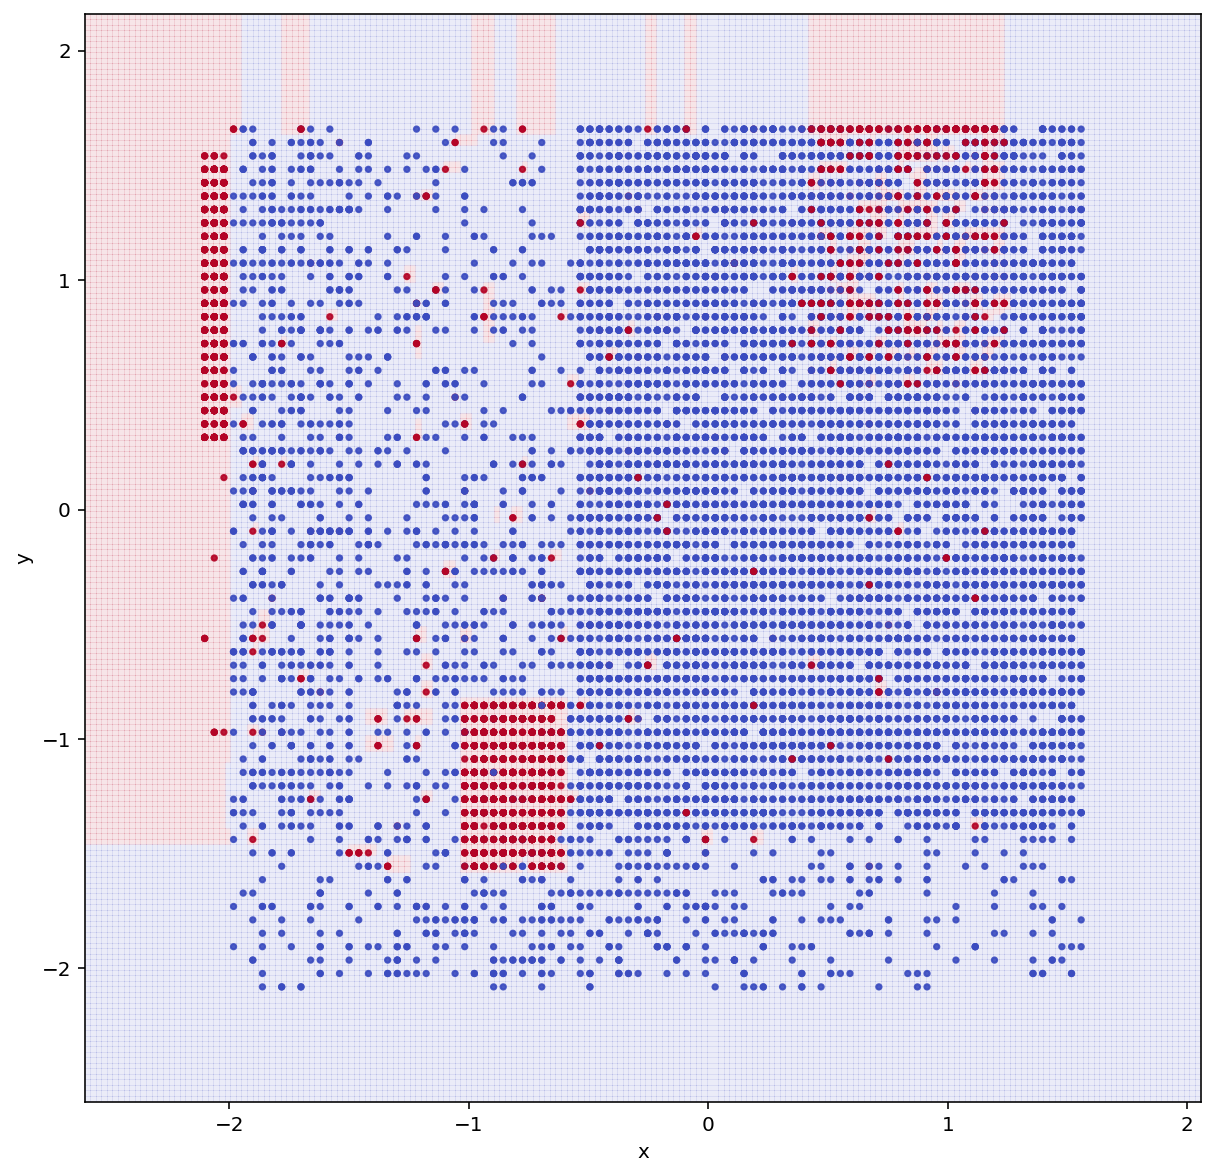

In [102]:
#  функция иллюстрирует предсказания алгоритма на плоскости, поэтому подавать в неё нужно 
#  не весь массив X, а только каких-нибудь 2 его столбца (попробуйте посмотреть, какие 
#  разделяющие поверхности получаются для разных пар признаков)
plot_predictions(X=X.values[:,:2], y=y,clf=RandomForestClassifier())

LogisticRegression(max_iter=200, solver='saga')

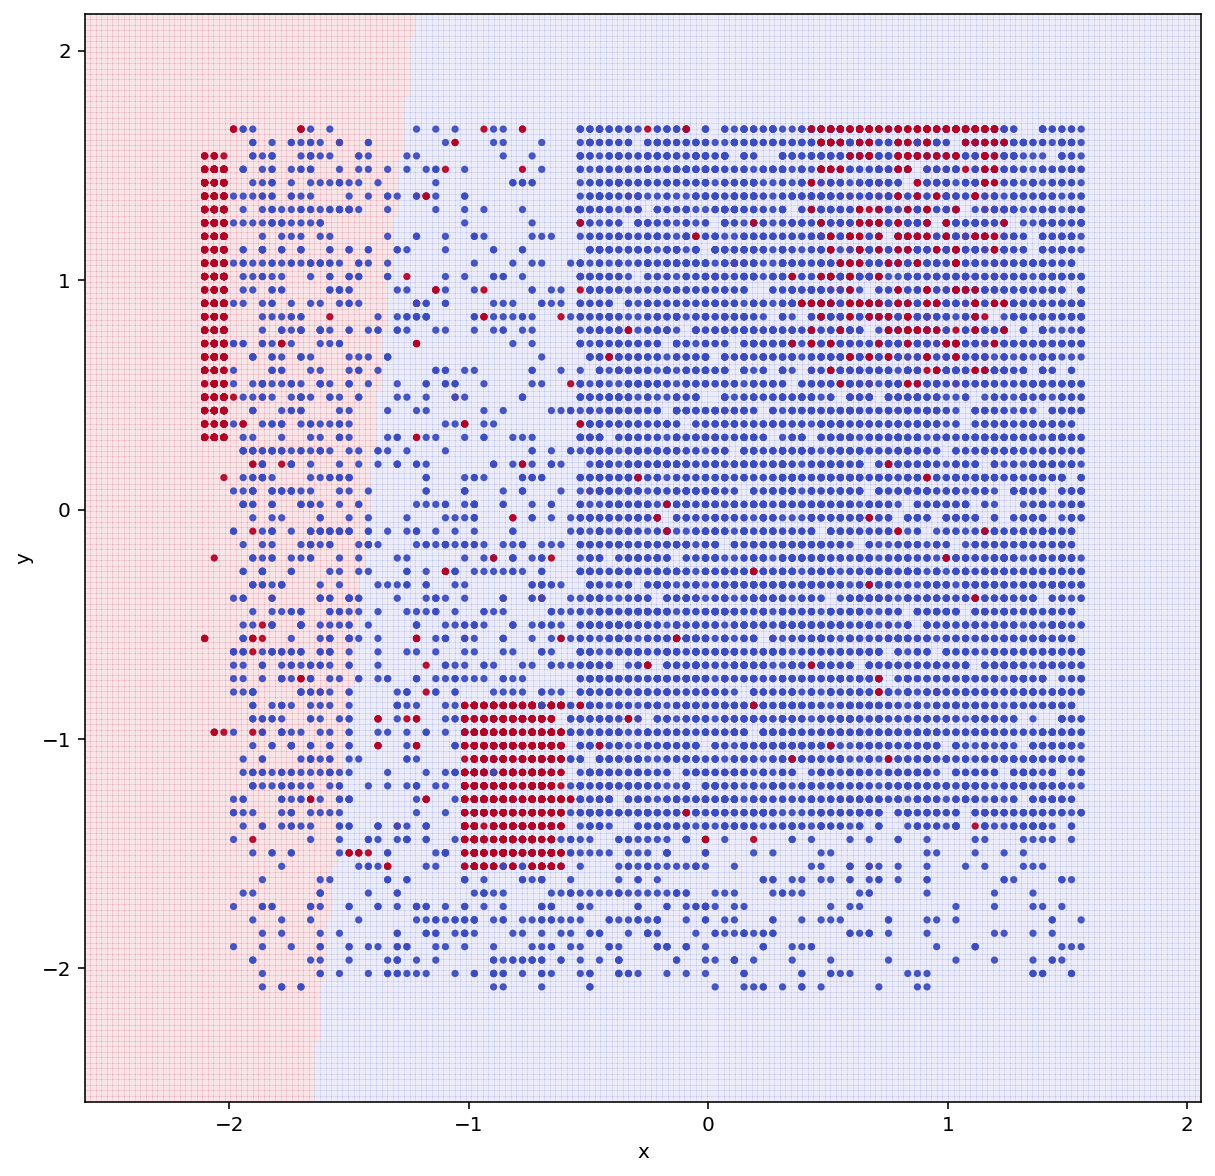

In [103]:
plot_predictions(X=X.values[:,:2], y=y,clf=lr)

In [52]:
# ПРАКТИКА - классификация изображений с цифрами по численным признакам
from sklearn.datasets import load_digits 

In [43]:
digits_data = load_digits()
X, y = digits_data['data'], digits_data['target']
print(X.shape, y.shape) 

(1797, 64) (1797,)


In [49]:
print(digits_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
# Для оценки качества мы будем использовать cross_val_score из sklearn.model_selection 
# с параметром cv=10
# Эта функция реализует k-fold cross validation c k равным значению параметра cv
# Предлагается использовать k=10, чтобы полученные оценки качества имели небольшой разброс, 
# и было проще проверить полученные ответы
# На практике же часто хватает и k=5
# Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел — 
# качество в каждом из k экспериментов k-fold cross validation. 
# Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() 
# у массива, который возвращает cross_val_score.

# С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество 
# в каком-то из пунктов не попадёт в диапазон, заданный для правильных ответов — в этом случае 
# попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» 
# значение. Если это не помогает, то где-то была допущена ошибка.

# Чтобы ускорить вычисление cross_val_score, следует попробовать использовать параметр n_jobs. 
# Число, которое вы подаёте в качестве этого параметра, соответствует количеству потоков вашего 
# процессора, которое будет задействовано в вычислении. Если указать n_jobs = -1, тогда будут 
# задействовано максимальное число потоков.

In [54]:
# Задание 7.1
# 1. Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его 
# работы с помощью cross_val_score.
# Эту величину введите в поле для ответа (ваше значение должно попасть в заданный интервал)

dec_tree = DecisionTreeClassifier()
cross_val_score(dec_tree, X, y, cv=10).mean()

0.8269304779639975

In [ ]:
# 2. Теперь давайте обучим BaggingClassifier на основе DecisionTreeClassifier. 
# Из sklearn.ensemble импортируйте BaggingClassifier, все параметры задайте по умолчанию. 
# Нужно изменить только количество базовых моделей, задав его равным 100.

# В поле для ответа введите качество бэггинга на нашем датасете (ваше значение должно попасть в заданный интервал).

# Подумайте, какие выводы можно сделать из соотношения качества одиночного дерева и бэггинга деревьев?

In [56]:
from sklearn.ensemble import BaggingClassifier

bagging_dec_tree = BaggingClassifier(
    base_estimator=dec_tree,
    n_estimators=100,
    )

cross_val_score(bagging_dec_tree, X, y, cv=10).mean()

0.9270577281191805

In [57]:
# 3. Изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый 
# алгоритм обучался не на всех d признаках, а на sqrt(d) случайных признаках.

# В поле для ответа введите качество работы получившегося классификатора (ваше значение должно 
# попасть в заданный интервал).

# Корень из числа признаков — часто используемая эвристика в задачах классификации, в задачах 
# регрессии же часто берут число признаков, деленное на три или log(d). Но в 
# общем случае ничто не мешает выбирать любое другое число случайных признаков, 
# добиваясь лучшего качества на кросс-валидации.

In [74]:
features = X.shape[1]
bagging_dec_tree = BaggingClassifier(
    base_estimator=dec_tree,
    n_estimators=100,
    max_features=int(np.sqrt(features))
    )

cross_val_score(bagging_dec_tree, X, y, cv=10).mean()

0.9237678460583488

In [ ]:
# 4. В предыдущем пункте мы выбирали подмножество один раз для каждого очередного дерева. 
# Следующим нашим шагом будет построение бэггинга на основе деревьев, которые выбирают случайное 
# подможество признаков для каждой вершины дерева.

# Для этого нам потребуется перенести отвечающий за это параметр из BaggingClassifier в 
# DecisionTreeClassifier. Для этого вам из документации нужно выяснить, какой параметр 
# DecisionTreeClassifier за это отвечает.

# В поле для ответа введите значение этого параметра (ваше значение должно попасть в заданный интервал).

# По-прежнему сэмплируем sqrt(d) признаков.

In [70]:
features = X.shape[1]
random_tree = DecisionTreeClassifier(
    max_features=int(np.sqrt(features)),
    )

bagging_dec_tree = BaggingClassifier(
    base_estimator=random_tree,
    n_estimators=100,
    )

cross_val_score(bagging_dec_tree, X, y, cv=10).mean()

0.9487833643699565

In [75]:
# Задание 7.2
# Полученный в задании 4 классификатор — бэггинг на рандомизированных деревьях (в которых при 
# построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется 
# только по ним). Это в точности соответствует алгоритму Random Forest
from sklearn.ensemble import RandomForestClassifier

In [77]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(features)),
    )

cross_val_score(random_forest, X, y, cv=10).mean()

0.9526908752327745